<span style="color:yellow"> The term <span style="color:magenta"><strong>cases</strong></span> will be used to indicate all types of cases i.e. <strong>Confirmed, Death and Recovered</strong>.<br>In case of a specific type of case, the type will be mentioned explicitly.</span>
### DATA TO BE REPRESENTED:-
1. Number of cases on a given day:-
    1. Globally.
    2. In a particular Country / Region.
    3. Filetering based on a given count i.e. > 1000 cases etc.
    4. Sorting in a partcular order.
2. Number of cases in span of some days:-
    1. Globally.
    2. In a particular Country / Region.
    3. Filetering based on a given count i.e. > 1 Lac cases etc.
    4. Sorting in a partcular order.
3. Displaying cases on a map:-
    1. Entire world map.
    2. A particular country / region.
    3. Displaying regions with some threshold number of cases i.e. > 1 Lac cases etc.
    4. Types of cases differentiated based on colors.
    5. Types of cases differentiated based on range of cases i.e. 0 - 10000, 10000 - 1 lac etc.
4. Think of different types of graphs that can be used:-
    1. Line graphs
    2. Scatter plots.
    3. Pie charts.
    4. World maps.
5. A race among the countries based on the number of active covid cases. (Horizontal bar charts)
6. Current  / Live data of countries / regions.
7. Give short summarized forms of covid articles.
8. Provide relevant covid research papers.

## IMPORTING DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import geopandas as gpd

In [2]:
mp.style.use('fivethirtyeight')
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_rows', 50)

# COLOR = 'black'
# mp.rcParams['text.color'] = COLOR
# mp.rcParams['axes.labelcolor'] = COLOR
# mp.rcParams['xtick.color'] = COLOR
# mp.rcParams['ytick.color'] = COLOR

In [10]:
# mp.style.available

## COVID DATA URLS

#### IMPORTING DATA

In [3]:
def create_data(url, type_of_case):
    raw_data = pd.read_csv(url)
    melted_data = pd.melt(raw_data,
                          id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'],
                          var_name = 'Date',
                          value_name = type_of_case)
    return melted_data

In [4]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [5]:
confirmed_data = create_data(confirmed_url, 'Confirmed')
deaths_data = create_data(deaths_url, 'Deaths')
recovered_data = create_data(recovered_url, 'Recovered')

In [6]:
confirmed_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0


In [10]:
deaths_data.head()

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0


In [11]:
recovered_data.head()

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0


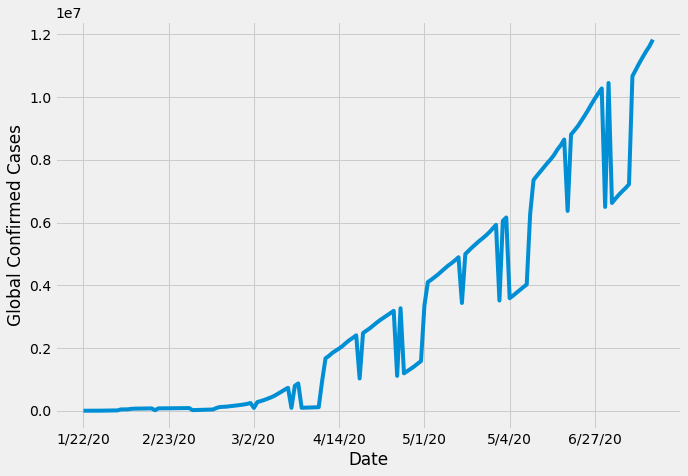

In [7]:
mp.figure(figsize = (10, 7))
mp.ylabel('Global Confirmed Cases')
mp.xlabel('Date')
confirmed_data.groupby('Date')['Confirmed'].sum().plot()

In [15]:
melted_confirmed_data_grouped_by_country_and_date = melted_confirmed_data.groupby(['Country/Region', 'Date']).sum()
melted_confirmed_data_grouped_by_country_and_date.loc[:, given_date]

KeyError: '1/22/20'

### CASES ON A GIVEN DATE GLOBALLY

In [10]:
given_date = '7/2/20'
confirmed_data_groupby_date = confirmed_data.groupby('Date').sum()
confirmed_data_groupby_date.loc[given_date, 'Confirmed']

10871926

### CASES ON A GIVEN DATE COUNTRY WISE
<span style="color:yellow">Originally the plan was to display all the data but the huge number of country/regions made it hard to present the data perfectly. <br>Thus the representation was changed to displaying only top and bottom 10 country/regions</span>

In [87]:
# given_date = '1/22/20'
melted_confirmed_data_grouped_by_country_and_date.loc[:].loc[given_date, 'Counts']

Lat      Long  Counts
Country/Region Date                                
Afghanistan    1/22/20  33.000000 65.000000       0
               1/23/20  33.000000 65.000000       0
               1/24/20  33.000000 65.000000       0
               1/25/20  33.000000 65.000000       0
               1/26/20  33.000000 65.000000       0
...                           ...       ...     ...
Zimbabwe       6/7/20  -20.000000 30.000000     282
               6/8/20  -20.000000 30.000000     287
               6/9/20  -20.000000 30.000000     314
               7/1/20  -20.000000 30.000000     605
               7/2/20  -20.000000 30.000000     617

[30644 rows x 3 columns]

In [15]:
melted_confirmed_data_grouped_by_date_and_country

Lat       Long  Confirmed
Date    Country/Region                                     
1/22/20 Afghanistan         33.000000  65.000000          0
        Albania             41.153300  20.168300          0
        Algeria             28.033900   1.659600          0
        Andorra             42.506300   1.521800          0
        Angola             -11.202700  17.873900          0
...                               ...        ...        ...
7/7/20  West Bank and Gaza  31.952200  35.233200       4647
        Western Sahara      24.215500 -12.885800         10
        Yemen               15.552727  48.516388       1297
        Zambia             -15.416700  28.283300       1895
        Zimbabwe           -20.000000  30.000000        787

[31584 rows x 3 columns]

In [ ]:
total_confirmed_cases_on_a_date_countrywise_sorted = \
    total_confirmed_cases_on_a_date_countrywise.sort_values(by = 'Counts', ascending = False)[:10]
countries = total_confirmed_cases_on_a_date_countrywise_sorted.index
counts = total_confirmed_cases_on_a_date_countrywise_sorted['Counts']
mp.rc('font', size=10)
mp.figure(figsize = (15, 8))
mp.bar(countries, counts, color = '#03dffc')
mp.ylabel('Confirmed Cases', fontsize = 15)
mp.xlabel('Countries', fontsize = 15)
mp.title(f'Number of Confirmed Cases on {given_date}', fontsize = 15)
mp.tight_layout()
mp.yticks([i for i in range(0, max(counts)+2, 2)])
for index,data in enumerate(counts):
    mp.text(x=index-0.1 , y =data+0.2 , s=f"{data}" , fontdict=dict(fontsize=20))

In [53]:
def num_cases_on_a_given_date_country_wise(data, given_date, type_of_case, ascending=False, num_countries = 10):
    data_grouped_by_date_and_country = data.groupby(['Date', 'Country/Region']).sum()
    data_on_a_date_country_wise = data_grouped_by_date_and_country.loc[given_date, :]
    data_on_a_date_country_wise = \
        data_on_a_date_country_wise.sort_values(by = type_of_case,
                                                ascending = ascending)[:min(num_countries, len(data_on_a_date_country_wise))]
    countries = data_on_a_date_country_wise.index
    case_counts = data_on_a_date_country_wise[type_of_case]
    mp.rc('font', size=10)
    mp.figure(figsize = (15, 8))
    mp.bar(countries, case_counts, color = '#03dffc')
    mp.ylabel(f'{type_of_case} Cases', fontsize = 15)
    mp.xlabel('Countries', fontsize = 15)
    mp.title(f'Number of {type_of_case} Cases on {given_date}', fontsize = 15)
    mp.tight_layout()
    mp.yticks([i for i in range(0, len(case_counts) + 2, 2)])
    for index, data in enumerate(case_counts):
        mp.text(x = index - 0.35, y = data, s = f'{data}', fontdict = dict(fontsize = 13))

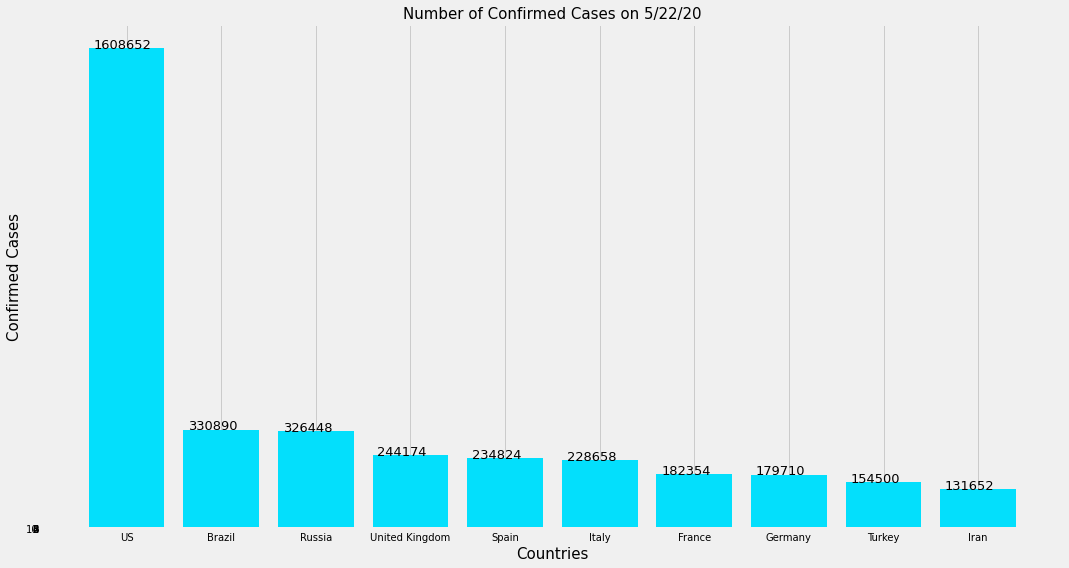

In [54]:
num_cases_on_a_given_date_country_wise(confirmed_data, '5/22/20', 'Confirmed')

In [78]:
def num_cases_on_a_given_date_country_wise(data, given_date, type_of_case, ascending=False, num_countries = 10, threshold = 0):
    data_grouped_by_date_and_country = data.groupby(['Date', 'Country/Region']).sum()
    
    data_on_a_date_country_wise = data_grouped_by_date_and_country.loc[given_date, :]
    filt = data_on_a_date_country_wise[type_of_case] >= threshold
    data_on_a_date_country_wise = data_on_a_date_country_wise[filt]
    data_on_a_date_country_wise = \
        data_on_a_date_country_wise.sort_values(by = type_of_case,
                                                ascending = ascending)[:min(num_countries, len(data_on_a_date_country_wise))]
    countries = data_on_a_date_country_wise.index
    case_counts = data_on_a_date_country_wise[type_of_case]
    mp.rc('font', size=10)
    mp.figure(figsize = (15, 8))
    mp.bar(countries, case_counts, color = '#03dffc')
    mp.ylabel(f'{type_of_case} Cases', fontsize = 15)
    mp.xlabel('Countries', fontsize = 15)
    mp.title(f'Number of {type_of_case} Cases on {given_date}', fontsize = 15)
    mp.tight_layout()
    mp.yticks([i for i in range(0, len(case_counts) + 2, 2)])
    for index, data in enumerate(case_counts):
        mp.text(x = index - 0.35, y = data, s = f'{data}', fontdict = dict(fontsize = 13))

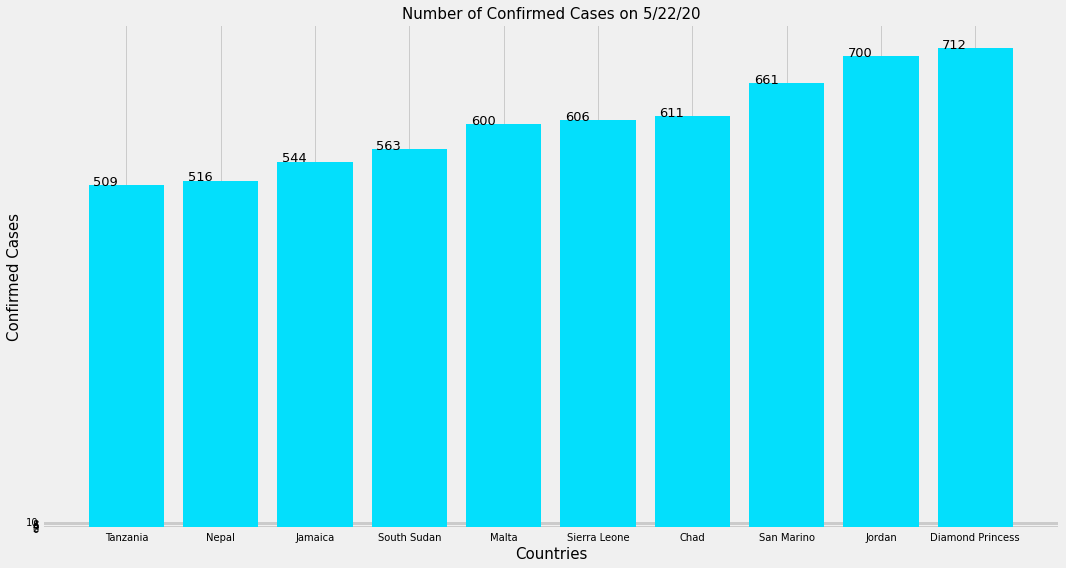

In [81]:
num_cases_on_a_given_date_country_wise(confirmed_data, '5/22/20', 'Confirmed',ascending = True, threshold = 500)

In [74]:
given_date = '5/22/20'
confirmed_data_grouped_by_date_and_country = confirmed_data.groupby(['Date', 'Country/Region']).sum()
total_confirmed_cases_on_a_date_countrywise = confirmed_data_grouped_by_date_and_country.loc[given_date, :]

In [75]:
filt = total_confirmed_cases_on_a_date_countrywise['Confirmed'] >= 500
total_confirmed_cases_on_a_date_countrywise[filt]

,Lat,Long,Confirmed
Country/Region,,,
Afghanistan,33.000000,65.000000,9216
Albania,41.153300,20.168300,981
Algeria,28.033900,1.659600,7918
Andorra,42.506300,1.521800,762
Argentina,-38.416100,-63.616700,10649
...,...,...,...
United Kingdom,270.029900,-482.924700,244174
Uruguay,-32.522800,-55.765800,753
Uzbekistan,41.377500,64.585300,3028
